In [ ]:
# Water potability prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
# Load dataset
df = pd.read_csv("/content/water_potability.csv")
df.fillna(df.median(numeric_only=True), inplace=True)

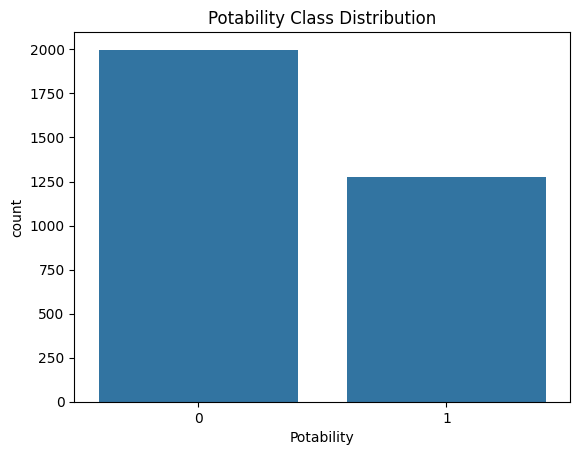

In [ ]:
# Visualize class distribution
sns.countplot(data=df, x='Potability')
plt.title("Potability Class Distribution")
plt.show()

In [ ]:
# Features & Scaling
X = df.drop("Potability", axis=1)
y = df["Potability"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# PCA for clustering visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


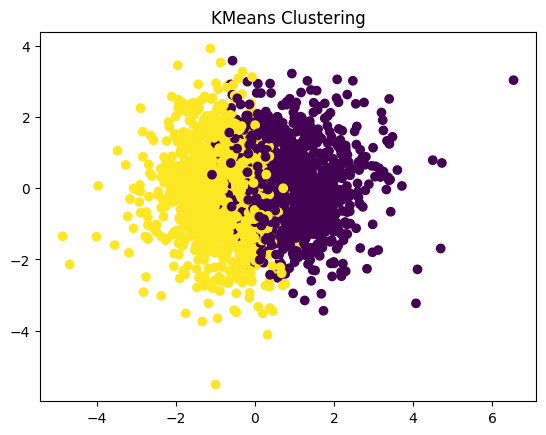

In [ ]:
# === CLUSTERING ===
# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Plot KMeans clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering")
plt.show()

In [ ]:
# === FEATURE SELECTION ===
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_scaled, y)
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features.tolist())

# Reduce dataset
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Selected features: ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon']


In [ ]:
# === CLASSIFICATION MODELS ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f"\n{name} Report:")
    print(classification_report(y_test, preds))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       412
           1       0.52      0.33      0.41       244

    accuracy                           0.64       656
   macro avg       0.60      0.58      0.57       656
weighted avg       0.62      0.64      0.62       656


SVM Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       412
           1       0.68      0.20      0.31       244

    accuracy                           0.67       656
   macro avg       0.67      0.57      0.55       656
weighted avg       0.67      0.67      0.61       656


KNN Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       412
           1       0.45      0.34      0.39       244

    accuracy                           0.60       656
   macro avg       0.55      0.55      0.54       656
weighted avg       0.58  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:01:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       412
           1       0.53      0.39      0.45       244

    accuracy                           0.64       656
   macro avg       0.61      0.59      0.59       656
weighted avg       0.63      0.64      0.63       656



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6107 - loss: 0.6901 

Deep Learning Model Accuracy: 0.62


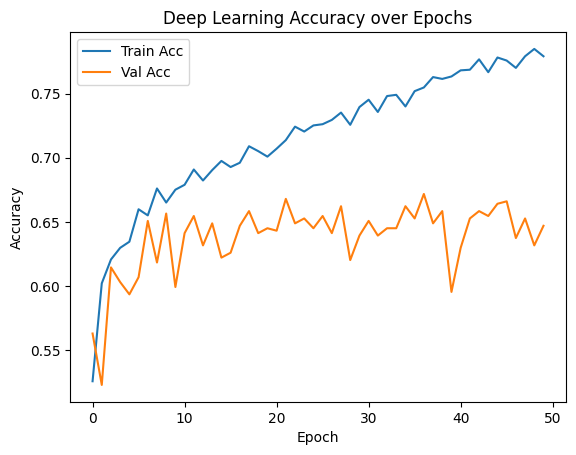

In [ ]:
# === DEEP LEARNING ===
# Prepare data
X_dl_train, X_dl_test, y_dl_train, y_dl_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
input_dim = X_dl_train.shape[1]

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y_dl_train)
class_weights = dict(enumerate(class_weights))

# Build neural network
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(X_dl_train, y_dl_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights, verbose=0)

# Evaluate
loss, acc = model.evaluate(X_dl_test, y_dl_test)
print(f"\nDeep Learning Model Accuracy: {acc:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Deep Learning Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
